In [1]:
from wann_genetic.tools import ExperimentSeries
from util import accuracy_swarmplot
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

In [3]:
data_dir = "../data/iris_init_pop/trial 4"
series = ExperimentSeries.from_spec_file(data_dir)
series.discover_data_dir()
df = series.assemble_stats()
series.var_names()

odict_keys(['initial_edge_prob', 'post_init_seed', 'population_seed'])

In [8]:
gen = np.arange(200)

selector = lambda params: params['initial_edge_prob/initial_genes'] == 'full' and params['initial_edge_prob/initial_enabled_edge_prob'] == 0

collection = list()

for c in series.configurations():
    env = series.configuration_env(c)
    if not selector(series.flat_values(c)):
        continue
    with env.open_data():
        metrics = env.load_gen_metrics()
    collection.append(metrics['MAX:accuracy.mean'])
    
data = np.empty((len(collection), 200))

for i,m in enumerate(collection):
    data[i, :] = m

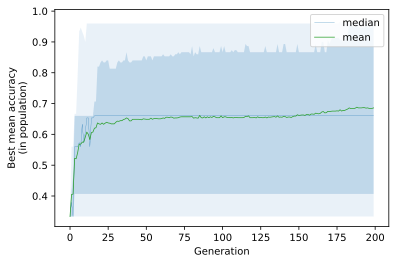

In [11]:
quantiles = np.quantile(data, (0, 0.25, 0.5, 0.75, 1), axis=0)
mean = np.mean(data, axis=0)

plt.plot(gen, quantiles[2], '-', label='median', linewidth=.25, color='tab:blue')
plt.plot(gen, mean, '-', label='mean', linewidth=.75, color='tab:green')
plt.legend()

plt.fill_between(gen, quantiles[1], quantiles[3], alpha=0.2, fc='tab:blue')
plt.fill_between(gen, quantiles[0], quantiles[4], alpha=0.1, fc='tab:blue')

plt.ylabel("Best mean accuracy\n(in population)")
plt.xlabel("Generation")
plt.show()

In [12]:
print(data[:,-1])

[0.33333333 0.65333333 0.33333333 0.40666667 0.66       0.89333333
 0.96       0.96       0.97333333]
